In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import string
import nltk

In [15]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\zafri\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


## Get Data

In [4]:
messages = pd.read_csv('C:/Users/zafri/Documents/Python Scripts/Learning/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Natural-Language-Processing/smsspamcollection/SMSSpamCollection',
                       sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploration

In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Length

In [51]:
messages['length'] = messages.message.apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


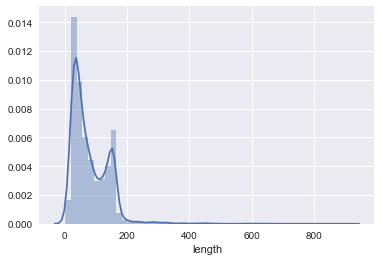

In [54]:
#messages.length.plot.hist(bins=100)
sns.distplot(messages['length'])

label
ham     Axes(0.125,0.125;0.775x0.755)
spam    Axes(0.125,0.125;0.775x0.755)
Name: length, dtype: object

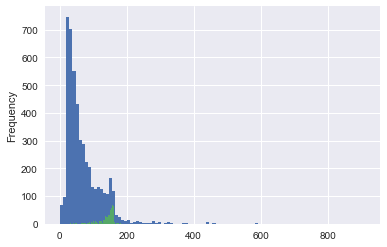

In [10]:
#Length distribution for spam/ham groups - 1 y-axis
messages.groupby('label').length.plot.hist(bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9D8616DD8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F9D8AA7470>], dtype=object)

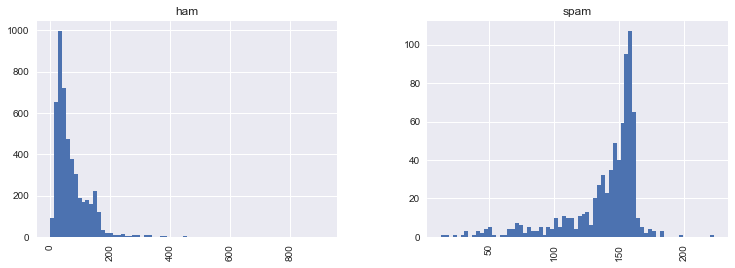

In [12]:
#Length distribution for spam/ham groups
messages.hist(column='length', by='label', bins= 70, figsize=(12,4))

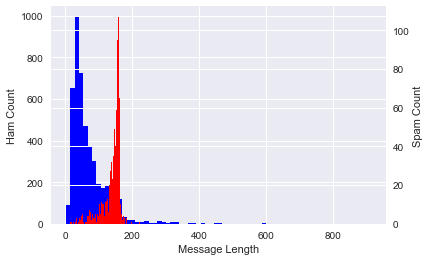

In [66]:
#Length distribution for spam/ham groups - 2 y-axis
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(messages[messages['label']=='ham'].length, bins= 70, color='b', label='Ham')
ax2 = ax1.twinx()
ax2.hist(messages[messages['label']=='spam'].length, bins= 70,color='r', label='Spam')

ax1.set_xlabel('Message Length')
ax1.set_ylabel('Ham Count')
ax2.set_ylabel('Spam Count')
#plt.legend()

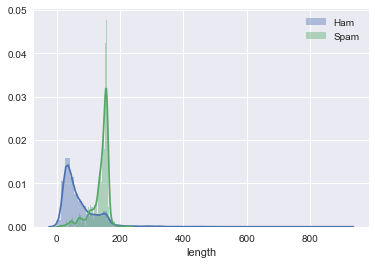

In [62]:
sns.distplot(messages[messages['label']=='ham'].length, bins=70, label='Ham')
sns.distplot(messages[messages['label']=='spam'].length, bins=70, label='Spam')

plt.legend()

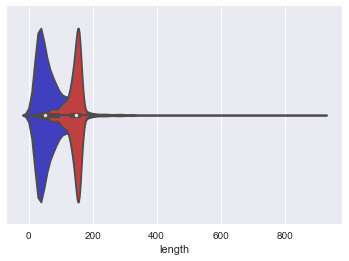

In [87]:
sns.violinplot(data = messages[messages['label']=='ham'], x='length', color = 'b', saturation=0.5)
sns.violinplot(data = messages[messages['label']=='spam'], x='length', color = 'r', saturation=0.5)

#plt.legend()

## Cleaning

In [16]:
#Stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [42]:
def text_process(text):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return list od clean text words
    '''
    # remove punctuations
    punc_free_mess = ''.join([char for char in text 
                              if char not in string.punctuation])
    
    # remove stopwords
    clean_m = [word for word in punc_free_mess.split() 
           if word.lower() not in stopwords.words('english')]
    
    return(clean_m)
    

In [38]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [67]:
#toconize the messages
messages['message'] = messages['message'].apply(text_process)

In [69]:
messages.message.head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [70]:
#Steming
# running, ran, run
# not going to be very helpful in this case

In [ ]:
#bag of words